In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import sidetable as stb
import numpy as np

In [101]:
df1 = pd.read_csv('../data/books_25_pages_author_info.csv',skipinitialspace=True)
df1 = df1.rename(columns = lambda x: x.strip())
value_author_num_unique_books = df1['author_num_unique_books'].values
df1 = df1.drop('author_num_unique_books',axis=1)
df1.insert(loc=8,column='author_num_unique_books',value=value_author_num_unique_books)
df1.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_isbn,book_review_count,author_num_unique_books,kindle_price,...,genre_unfinished,genre_urban-planning,genre_vegan,genre_war,genre_womens,genre_womens-studies,genre_world-war-ii,genre_writing,genre_young-adult,genre_zen
0,/book/show/839461.Self_Esteem,Matthew McKay,4.02,1143,1987.0,Self-Esteem,9.781570e+12,89.0,119.0,9.99,...,0,0,0,0,0,0,0,0,0,0
1,/book/show/369266.The_Dialectical_Behavior_The...,Matthew McKay,4.25,3377,2007.0,The Dialectical Behavior Therapy Skills Workbook,9.781570e+12,106.0,119.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,/book/show/4485966-talent-is-overrated,Geoff Colvin,3.97,16736,2008.0,Talent is Overrated,9.781590e+12,1005.0,8.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,/book/show/168981.QBQ_The_Question_Behind_the_...,John G. Miller,3.86,8980,2001.0,QBQ! The Question Behind the Question,9.780400e+12,608.0,20.0,12.99,...,0,0,0,0,0,0,0,0,0,0
4,/book/show/64369.Mindfulness_in_Plain_English,Henepola Gunaratana,4.19,12802,1992.0,Mindfulness in Plain English,9.780860e+12,825.0,30.0,12.35,...,0,0,0,0,0,0,0,0,0,14


In [102]:
#[print(i) for i in df1.columns]

In [103]:
#drop unimportant columns
df2 = df1.drop(columns=['book_reference','author_names','book_title','author_link','genre_unfinished','book_isbn'])
df2.head()

,avg_rating,num_ratings,year_published,book_review_count,author_num_unique_books,kindle_price,genre_20th-century,genre_21st-century,genre_abuse,genre_academic,...,genre_true-crime,genre_urban-planning,genre_vegan,genre_war,genre_womens,genre_womens-studies,genre_world-war-ii,genre_writing,genre_young-adult,genre_zen
0,4.02,1143,1987.0,89.0,119.0,9.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.25,3377,2007.0,106.0,119.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.97,16736,2008.0,1005.0,8.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.86,8980,2001.0,608.0,20.0,12.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.19,12802,1992.0,825.0,30.0,12.35,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14


In [104]:
# check NaN values
df2.loc[:,['avg_rating','num_ratings','year_published','book_review_count','kindle_price','author_num_unique_books']].stb.missing()

,missing,total,percent
kindle_price,653,1249,52.281825
author_num_unique_books,25,1249,2.001601
year_published,16,1249,1.281025
book_review_count,6,1249,0.480384
avg_rating,0,1249,0.000000
num_ratings,0,1249,0.000000


In [105]:
# drop rows where kindle_price or book_review_count or year_pubished are NaN because they are important values
df3 = df2.dropna()
len(df3.index)

579

count    579.000000
mean      10.023333
std        4.311436
min        0.000000
25%        8.015000
50%        9.990000
75%       12.990000
max       39.990000
Name: kindle_price, dtype: float64

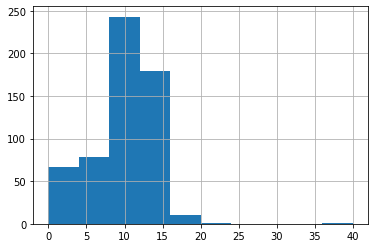

In [106]:
# explore kindle_price
df3['kindle_price'].hist()
df3['kindle_price'].describe()

In [107]:
# drop books with price zero because they actually have greater price #TODO
df4 = df3[df3['kindle_price']>0]
len(df4.index)

546

count      546.000000
mean      1405.529304
std       3141.142890
min         26.000000
25%        232.250000
50%        494.000000
75%       1133.750000
max      33024.000000
Name: book_review_count, dtype: float64

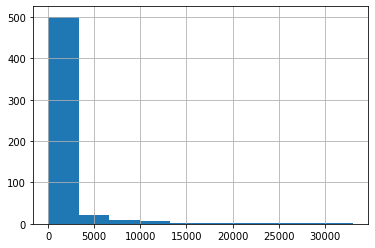

In [108]:
# explore book_review_count
df4['book_review_count'].hist()
df4['book_review_count'].describe()

count       546.000000
mean      22803.421245
std       67167.037670
min         562.000000
25%        2808.500000
50%        5973.000000
75%       16231.750000
max      945306.000000
Name: num_ratings, dtype: float64

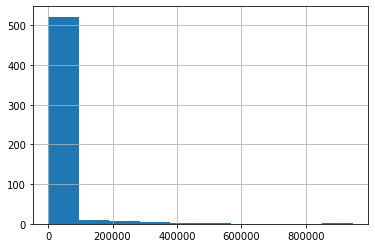

In [109]:
# explore num_ratings
df4['num_ratings'].hist()
df4['num_ratings'].describe()

count     546.000000
mean       85.626374
std       185.935442
min         2.000000
25%         9.000000
50%        25.000000
75%        68.000000
max      2154.000000
Name: author_num_unique_books, dtype: float64

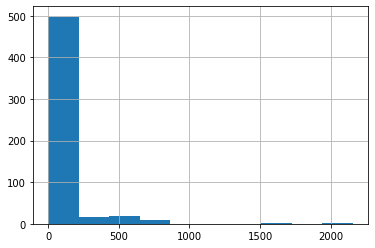

In [110]:
# explore num_ratings
df4['author_num_unique_books'].hist()
df4['author_num_unique_books'].describe()

In [122]:
# sum the genres
df_percent_genre = df4.copy()
df_percent_genre['sum_genres'] = df4[df4.columns[6::]].sum(axis=1)
df_percent_genre.head()

,avg_rating,num_ratings,year_published,book_review_count,author_num_unique_books,kindle_price,genre_20th-century,genre_21st-century,genre_abuse,genre_academic,...,genre_urban-planning,genre_vegan,genre_war,genre_womens,genre_womens-studies,genre_world-war-ii,genre_writing,genre_young-adult,genre_zen,sum_genres
0,4.02,1143,1987.0,89.0,119.0,9.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,238
3,3.86,8980,2001.0,608.0,20.0,12.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,562
4,4.19,12802,1992.0,825.0,30.0,12.35,0,0,0,0,...,0,0,0,0,0,0,0,0,14,1429
6,4.24,3752,2015.0,441.0,4.0,11.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,522
8,3.70,2570,2013.0,362.0,13.0,8.26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,267


In [123]:
df_percent_genre['sum_genres'].describe()

count      546.000000
mean      1301.835165
std       2414.879971
min        102.000000
25%        294.250000
50%        528.000000
75%       1288.500000
max      22670.000000
Name: sum_genres, dtype: float64

In [124]:
# create genres percentage columns
columns_genre = list(df4.columns[6::])
for columni in columns_genre:
    df_percent_genre[columni+'_percent'] = df_percent_genre.apply(lambda x : x[columni]/x['sum_genres'],axis=1)
df_percent_genre.head()

,avg_rating,num_ratings,year_published,book_review_count,author_num_unique_books,kindle_price,genre_20th-century,genre_21st-century,genre_abuse,genre_academic,...,genre_true-crime_percent,genre_urban-planning_percent,genre_vegan_percent,genre_war_percent,genre_womens_percent,genre_womens-studies_percent,genre_world-war-ii_percent,genre_writing_percent,genre_young-adult_percent,genre_zen_percent
0,4.02,1143,1987.0,89.0,119.0,9.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,3.86,8980,2001.0,608.0,20.0,12.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,4.19,12802,1992.0,825.0,30.0,12.35,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009797
6,4.24,3752,2015.0,441.0,4.0,11.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,3.70,2570,2013.0,362.0,13.0,8.26,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [125]:
# create column for normalized num_ratings and review_count by years since published
# use only books from previous 2019 or older
df_out = df_percent_genre[df_percent_genre['year_published']<2020]
df_out['ratings_per_month_since_published'] = df_out.apply(lambda x : x['num_ratings']/(12*(2020-x['year_published'])),axis=1)
df_out['reviews_per_month_since_published'] = df_out.apply(lambda x : x['book_review_count']/(12*(2020-x['year_published'])),axis=1)
df_out.head()

C:\Users\valer\anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\valer\anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,avg_rating,num_ratings,year_published,book_review_count,author_num_unique_books,kindle_price,genre_20th-century,genre_21st-century,genre_abuse,genre_academic,...,genre_vegan_percent,genre_war_percent,genre_womens_percent,genre_womens-studies_percent,genre_world-war-ii_percent,genre_writing_percent,genre_young-adult_percent,genre_zen_percent,ratings_per_month_since_published,reviews_per_month_since_published
0,4.02,1143,1987.0,89.0,119.0,9.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.886364,0.224747
3,3.86,8980,2001.0,608.0,20.0,12.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,39.385965,2.666667
4,4.19,12802,1992.0,825.0,30.0,12.35,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009797,38.101190,2.455357
6,4.24,3752,2015.0,441.0,4.0,11.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,62.533333,7.350000
8,3.70,2570,2013.0,362.0,13.0,8.26,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,30.595238,4.309524


count    375.000000
mean       3.273165
std        2.752461
min        0.083333
25%        0.965972
50%        2.371212
75%        4.825000
max        9.992424
Name: reviews_per_month_since_published, dtype: float64

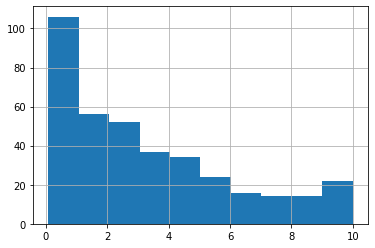

In [126]:
df_out[df_out['reviews_per_month_since_published']<10]['reviews_per_month_since_published'].hist()
df_out[df_out['reviews_per_month_since_published']<10]['reviews_per_month_since_published'].describe()

In [127]:
df_out = df_out[df_out['reviews_per_month_since_published']<10]

<AxesSubplot:>

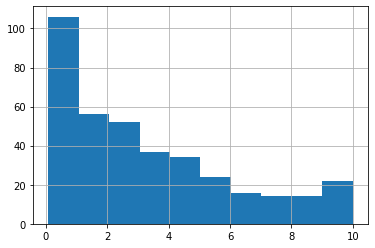

In [128]:
df_out[df_out['reviews_per_month_since_published']<10]['reviews_per_month_since_published'].hist()

In [129]:
means = []
colnames_small = []
count = 0
for i in df_out.columns:
    if not "percent" in i: continue
    try:
        means.append(df_out[i].mean())
        if df_out[i].mean() < 1e-03: 
            count += 1
            colnames_small.append(i)
    except:
        continue
print(len(means),count,count/len(means), np.median(means),np.mean(means),np.min(means),np.max(means))

243 195 0.8024691358024691 6.926406926406927e-05 0.00411522633744856 0.0 0.251712844052178


Note that 40% of the features are genres are less than the the 1e-5, and the median is 6e-5. Let's clean the data more

In [22]:
df_out2 = df_out.drop(colnames_small,axis=1)
print(len(df_out2.index),len(df_out2.columns))

380 302


In [23]:
df_out2.to_csv('../data/books_25_pages_clean0.csv',index=False)